#<strong><font color="9FC87E">Desafio - Challenge TWO Data Science – Telecom X</font></strong>

##**Cargando los datos**

In [2248]:
url_Telecom_X = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

###**Conviertiendo los datos a un DataFrame de Pandas para facilitar su manipulación.**

In [2249]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2250]:
df = pd.read_json(url_Telecom_X)

In [2251]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


###**Normalizar columnas anidadas**

In [2253]:
df_normalizado = pd.concat([df[['customerID', 'Churn']],
                      pd.concat([pd.json_normalize(df[col]) for col in ['customer', 'phone', 'internet', 'account']], axis=1)],
                    axis=1)

In [2254]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [2255]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


###**Comprobación de incoherencias en los datos**

####**Valores unicos**

In [2256]:
for columna in df_normalizado.columns:
    n_unicos = df_normalizado[columna].nunique()
    total_filas = df_normalizado.shape[0]
    valores_unicos = df_normalizado[columna].unique()

    print(f"Columna: {columna}")
    print(f" - Cantidad de valores únicos: {n_unicos}")

    if n_unicos == 1:
        print("   → Esta columna tiene un solo valor (posiblemente inútil).")
    elif n_unicos == total_filas:
        print("   → Esta columna tiene un valor único por fila (posible ID).")
    elif n_unicos < 10:
        print("   → Esta columna tiene pocos valores distintos (posible categórica).")
    else:
        print("   → Esta columna tiene varios valores únicos.")

    # Mostrar los valores únicos (hasta 10)
    print(" - Valores únicos (máx 10 mostrados):", valores_unicos[:10])
    if n_unicos > 10:
        print("   ... (más valores únicos no mostrados)")

    print("-" * 60)


Columna: customerID
 - Cantidad de valores únicos: 7267
   → Esta columna tiene un valor único por fila (posible ID).
 - Valores únicos (máx 10 mostrados): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
   ... (más valores únicos no mostrados)
------------------------------------------------------------
Columna: Churn
 - Cantidad de valores únicos: 3
   → Esta columna tiene pocos valores distintos (posible categórica).
 - Valores únicos (máx 10 mostrados): ['No' 'Yes' '']
------------------------------------------------------------
Columna: gender
 - Cantidad de valores únicos: 2
   → Esta columna tiene pocos valores distintos (posible categórica).
 - Valores únicos (máx 10 mostrados): ['Female' 'Male']
------------------------------------------------------------
Columna: SeniorCitizen
 - Cantidad de valores únicos: 2
   → Esta columna tiene pocos valores distintos (posible categórica).
 - Valores úni

In [2257]:
cols_revisar = df_normalizado[['Churn','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]


In [2258]:
for col in cols_revisar:
    print(f"\n--- {col} ---")
    print(df_normalizado[col].value_counts())



--- Churn ---
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64

--- StreamingTV ---
StreamingTV
No                     2896
Y

####**Duplicados**

In [2259]:
duplicados = df_normalizado.duplicated()
print(f"Duplicados: {duplicados.sum()}")

Duplicados: 0


####**Nulos**

In [2260]:
valores_nulos = df_normalizado.isnull().values.sum()
print(valores_nulos[valores_nulos > 0])

[]


In [2261]:
total_filas = df_normalizado.shape[0]

for columna in df_normalizado.columns:
    # Convertir a string para poder evaluar los espacios en blanco
    col_serie = df_normalizado[columna].astype(str)

    # Contar valores en blanco (vacíos o con solo espacios)
    n_blancos = (col_serie.str.strip() == "").sum()
    porcentaje = (n_blancos / total_filas) * 100

    print(f"Columna: {columna}")
    print(f" - Valores en blanco o vacíos: {n_blancos} ({porcentaje:.2f}%)")

    if n_blancos == 0:
        print("   → No tiene valores en blanco.")
    elif porcentaje < 5:
        print("   → Tiene pocos valores en blanco.")
    elif porcentaje < 30:
        print("   → Tiene una cantidad moderada de valores en blanco.")
    else:
        print("   → Tiene muchos valores en blanco, revisar esta columna.")

    print("-" * 60)


Columna: customerID
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: Churn
 - Valores en blanco o vacíos: 224 (3.08%)
   → Tiene pocos valores en blanco.
------------------------------------------------------------
Columna: gender
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: SeniorCitizen
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: Partner
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: Dependents
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: tenure
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene val

####**Manejo de valores nulos y conversión de datos númericos**

In [2262]:
import numpy as np

# Asegurarse de que 'Charges.Total' sea numérica
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

# Reemplazar valores en blanco en 'Charges.Total' con la mediana
mediana_charges = df_normalizado['Charges.Total'].median()
df_normalizado['Charges.Total'].fillna(mediana_charges, inplace=True)

# Eliminar filas donde 'Churn' esté en blanco (vacío o solo espacios)
df_normalizado = df_normalizado[df_normalizado['Churn'].astype(str).str.strip() != '']

# (Opcional) Resetear índice después de eliminar filas
df_normalizado.reset_index(drop=True, inplace=True)

# Confirmar limpieza
print("Limpieza aplicada:")
print(f"- 'Charges.Total' sin vacíos: {df_normalizado['Charges.Total'].isna().sum() == 0}")
print(f"- Filas sin 'Churn' vacío: {df_normalizado['Churn'].astype(str).str.strip().eq('').sum() == 0}")


Limpieza aplicada:
- 'Charges.Total' sin vacíos: True
- Filas sin 'Churn' vacío: True


In [2263]:
total_filas = df_normalizado.shape[0]

for columna in df_normalizado.columns:
    # Convertir a string para poder evaluar los espacios en blanco
    col_serie = df_normalizado[columna].astype(str)

    # Contar valores en blanco (vacíos o con solo espacios)
    n_blancos = (col_serie.str.strip() == "").sum()
    porcentaje = (n_blancos / total_filas) * 100

    print(f"Columna: {columna}")
    print(f" - Valores en blanco o vacíos: {n_blancos} ({porcentaje:.2f}%)")

    if n_blancos == 0:
        print("   → No tiene valores en blanco.")
    elif porcentaje < 5:
        print("   → Tiene pocos valores en blanco.")
    elif porcentaje < 30:
        print("   → Tiene una cantidad moderada de valores en blanco.")
    else:
        print("   → Tiene muchos valores en blanco, revisar esta columna.")

    print("-" * 60)


Columna: customerID
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: Churn
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: gender
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: SeniorCitizen
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: Partner
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: Dependents
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores en blanco.
------------------------------------------------------------
Columna: tenure
 - Valores en blanco o vacíos: 0 (0.00%)
   → No tiene valores 

####**Manejo de inconsistencias**

In [2264]:
for columna in df_normalizado.select_dtypes(include='object').columns:
    df_normalizado[columna] = ( df_normalizado[columna].astype(str).str.lower().str.replace(' ', '_').str.replace('-', '_').str.strip()
    )

In [2265]:
df_final = df_normalizado

In [2266]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002_orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one_year,yes,mailed_check,65.6,593.30
1,0003_mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month_to_month,no,mailed_check,59.9,542.40
2,0004_tlhlj,yes,male,0,no,no,4,yes,no,fiber_optic,...,no,yes,no,no,no,month_to_month,yes,electronic_check,73.9,280.85
3,0011_igkff,yes,male,1,yes,no,13,yes,no,fiber_optic,...,yes,yes,no,yes,yes,month_to_month,yes,electronic_check,98.0,1237.85
4,0013_exchz,yes,female,1,yes,no,3,yes,no,fiber_optic,...,no,no,yes,yes,no,month_to_month,yes,mailed_check,83.9,267.40


####**Columna de cuentas diarias**

In [2267]:
df_final['Daily_Accounts'] = (df_final['Charges.Monthly'] / 30).round(2)

In [2268]:
print(df_final[['Charges.Monthly','Daily_Accounts']])

      Charges.Monthly  Daily_Accounts
0               65.60            2.19
1               59.90            2.00
2               73.90            2.46
3               98.00            3.27
4               83.90            2.80
...               ...             ...
7038            55.15            1.84
7039            85.10            2.84
7040            50.30            1.68
7041            67.85            2.26
7042            59.00            1.97

[7043 rows x 2 columns]


####**Estandarización y transformación de datos**

In [2269]:
# 1. Normalizar nombres de columnas (por si hay espacios o mayúsculas)
df_final.columns = df_final.columns.str.strip().str.lower()

# 2. Convertir valores de texto a minúsculas y quitar espacios
columnas_texto = df_final.select_dtypes(include='object').columns
for col in columnas_texto:
    df_final[col] = df_final[col].astype(str).str.strip().str.lower()

In [2270]:
#  Traducir valores de texto
valores_traducidos = {
    'yes': 'si',
    'no': 'no',
    'male': 'hombre',
    'female': 'mujer',
    'no_internet_service': 'sin_servicio_de_internet',
    'no_phone_service': 'sin_servicio_telefonico',
    'month_to_month': 'mes_a_mes',
    'one_year': 'un_año',
    'two_year': 'dos_años',
    'electronic_check': 'cheque_electronico',
    'mailed_check': 'cheque_por_correo',
    'bank_transfer_(automatic)': 'transferencia_bancaria',
    'credit_card_(automatic)': 'tarjeta_de_credito',
    'dsl': 'adsl',
    'fiber_optic': 'fibra_optica',
    'no': 'no',
    'none': '',
    'nan': ' '
}

In [2271]:
for col in columnas_texto:
    df_final[col] = df_final[col].replace(valores_traducidos)

# 4. Renombrar columnas al español
df_final.rename(columns={
    'customerid': 'id_cliente',
    'churn': 'cancelado',
    'gender': 'genero',
    'seniorcitizen': 'adulto',
    'partner': 'pareja',
    'dependents': 'dependencias',
    'tenure': 'tenencia',
    'phoneservice': 'servicio_telefonico',
    'multiplelines': 'lineas_multiples',
    'internetservice': 'servicio_internet',
    'onlinesecurity': 'seguridad_en_linea',
    'onlinebackup': 'respaldo_en_linea',
    'deviceprotection': 'proteccion_dispositivo',
    'techsupport': 'soporte_tecnico',
    'streamingtv': 'transmision_tv',
    'streamingmovies': 'transmision_peliculas',
    'contract': 'tipo_contrato',
    'paperlessbilling': 'factura_sin_papel',
    'paymentmethod': 'metodo_pago',
    'charges.monthly': 'cargos_mensuales',
    'charges.total': 'cargos_totales',
    'daily_accounts': 'cuentas_diarias'
}, inplace=True)


In [2272]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7043 non-null   object 
 1   cancelado               7043 non-null   object 
 2   genero                  7043 non-null   object 
 3   adulto                  7043 non-null   int64  
 4   pareja                  7043 non-null   object 
 5   dependencias            7043 non-null   object 
 6   tenencia                7043 non-null   int64  
 7   servicio_telefonico     7043 non-null   object 
 8   lineas_multiples        7043 non-null   object 
 9   servicio_internet       7043 non-null   object 
 10  seguridad_en_linea      7043 non-null   object 
 11  respaldo_en_linea       7043 non-null   object 
 12  proteccion_dispositivo  7043 non-null   object 
 13  soporte_tecnico         7043 non-null   object 
 14  transmision_tv          7043 non-null   

In [2273]:
mapeos = {
    # Columnas binarias simples si/no a 1/0 y combinadas
    'cancelado': {'si': 1, 'no': 0},
    'genero': {'hombre': 1, 'mujer': 0},
    'adulto': {'si': 1, 'no': 0},
    'pareja': {'si': 1, 'no': 0},
    'dependencias': {'si': 1, 'no': 0},
    'servicio_telefonico': {'si': 1, 'no': 0},
    'factura_sin_papel': {'si': 1, 'no': 0},
    'respaldo_en_linea': {'si': 1, 'no': 0,'sin_servicio_de_internet': 0},
    'lineas_multiples': {'si': 1, 'no': 0,'sin_servicio_telefonico': 0},
    'servicio_internet': {'si': 1, 'no': 0, 'sin_servicio_de_internet': 0},
    'seguridad_en_linea': {'si': 1, 'no': 0,'sin_servicio_de_internet': 0},
    'proteccion_dispositivo': {'si': 1, 'no': 0,'sin_servicio_de_internet': 0},
    'soporte_tecnico': {'si': 1, 'no': 0,'sin_servicio_de_internet': 0},
    'transmision_tv': {'si': 1, 'no': 0, 'sin_servicio_de_internet': 0},
    'transmision_peliculas': {'si': 1, 'no': 0,'sin_servicio_de_internet': 0},


}

df_final.replace(mapeos, inplace=True)

In [2274]:
df_final.sample(5)

,id_cliente,cancelado,genero,adulto,pareja,dependencias,tenencia,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,transmision_tv,transmision_peliculas,tipo_contrato,factura_sin_papel,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
4545,6407_utslv,0,0,1,0,0,2,1,0,fibra_optica,...,0,0,1,0,mes_a_mes,1,transferencia_bancaria,83.80,163.70,2.79
91,0147_eswwr,0,0,1,1,0,39,1,1,fibra_optica,...,0,1,1,1,mes_a_mes,1,cheque_electronico,101.25,3949.15,3.38
6826,9696_rmyba,0,1,0,0,0,5,1,0,fibra_optica,...,0,0,1,0,mes_a_mes,1,cheque_por_correo,80.10,398.55,2.67
2624,3733_uocwf,0,1,1,1,0,61,1,1,fibra_optica,...,0,1,0,0,un_año,1,transferencia_bancaria,85.55,5251.75,2.85
4417,6229_lsckb,0,1,1,0,0,6,1,0,fibra_optica,...,0,0,1,0,mes_a_mes,1,cheque_electronico,79.70,497.60,2.66


In [2275]:
df_final['cancelado'] = df_final['cancelado'].astype(np.int64)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7043 non-null   object 
 1   cancelado               7043 non-null   int64  
 2   genero                  7043 non-null   int64  
 3   adulto                  7043 non-null   int64  
 4   pareja                  7043 non-null   int64  
 5   dependencias            7043 non-null   int64  
 6   tenencia                7043 non-null   int64  
 7   servicio_telefonico     7043 non-null   int64  
 8   lineas_multiples        7043 non-null   int64  
 9   servicio_internet       7043 non-null   object 
 10  seguridad_en_linea      7043 non-null   int64  
 11  respaldo_en_linea       7043 non-null   int64  
 12  proteccion_dispositivo  7043 non-null   int64  
 13  soporte_tecnico         7043 non-null   int64  
 14  transmision_tv          7043 non-null   

In [2276]:
df_final.to_excel('df_final.xlsx', index=False)

###**Análisis Descriptivo**

In [2277]:
df_final.describe()

,cancelado,genero,adulto,pareja,dependencias,tenencia,servicio_telefonico,lineas_multiples,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,transmision_tv,transmision_peliculas,factura_sin_papel,cargos_mensuales,cargos_totales,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2281.906815,2.158675
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2265.274362,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,1.180000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000



---

## **Análisis Descriptivo Profundo del Comportamiento de los Clientes**

---

### **cancelado**
Hay una parte considerable de clientes que han cancelado el servicio, lo cual refleja que existe una tasa de abandono real y relevante. Esto puede estar relacionado con experiencias negativas, insatisfacción, precios altos, mala atención o falta de valor percibido. No es un comportamiento residual: es una señal clara de que hay puntos débiles en el servicio.

---

### **genero**
La empresa no tiene un sesgo hacia hombres o mujeres, probablemente porque el servicio es de tipo general (telefonía, internet), y ambos géneros lo consumen por igual. Esto sugiere que la captación ha sido natural y uniforme.

---

### **adulto**
Puede deberse a que no se registra correctamente el dato o porque muchos clientes usan datos de terceros para contratar el servicio (por ejemplo, hijos a nombre de padres). También puede indicar que el campo no es obligatorio y no siempre se diligencia.

---

### **pareja**
Es un reflejo realista de la población adulta general, en donde una proporción importante vive en pareja. Este dato aparece porque muchos usuarios comparten servicios o contratan líneas conjuntas, lo cual se registra.

---

### **dependencias**
Tener dependientes puede no ser relevante para muchos usuarios al momento de registrar el servicio, o simplemente no se solicita ese dato de forma clara. También puede reflejar un perfil de cliente joven o sin hijos.

---

### **tenencia**
Esto indica que la base de clientes está compuesta tanto por personas que recién se suscribieron como por otras que llevan muchos años. No todos los clientes se mantienen a largo plazo y hay una rotación constante.

---

### **servicio_telefonico**
Porque probablemente es el servicio base ofrecido por la empresa. Es el más básico, obligatorio o incluido en todos los planes. También puede ser el primero que contratan los nuevos clientes.

---

### **lineas_multiples**
Esto refleja que hay clientes que usan el servicio para grupos familiares, empresas pequeñas o tienen varios dispositivos. También es común que se ofrezcan descuentos por líneas adicionales, lo que incentiva esa contratación.

---

### **seguridad_en_linea, respaldo_en_linea, proteccion_dispositivo, soporte_tecnico**
Estos servicios suelen ser percibidos como opcionales o poco necesarios. Puede que no se comprendan bien sus beneficios, que se consideren costosos o que el cliente no vea el riesgo real que cubren. También puede deberse a falta de promoción o visibilidad.

---

### **transmision_tv y transmision_peliculas**
El entretenimiento es una necesidad común, por eso estos servicios tienen mayor adopción. Son más visibles, con beneficios claros (contenido, ocio), y probablemente tienen promociones o se ofrecen en paquetes atractivos.

---

### **factura_sin_papel**
Refleja que muchos clientes están abiertos a lo digital o que se ha promovido con éxito. Es una alternativa cómoda, moderna y posiblemente incentivada con descuentos u obligatoriedad en plataformas en línea.

---

### **cargos_mensuales**
La empresa ofrece múltiples planes con precios variables. También puede haber clientes con servicios combinados o promociones aplicadas. La diversidad de pagos mensuales refleja distintos niveles de consumo y perfil económico.

---

### **cargos_totales**
Depende del tiempo que lleven en la empresa y de los servicios contratados. Clientes nuevos tienen cargos bajos y los antiguos acumulan más. También influye si el cliente ha tenido meses con consumo elevado.

---

### **cuentas_diarias**
Cada cliente tiene un nivel de uso distinto. Algunos hacen un uso intensivo de los servicios día a día, mientras que otros apenas los utilizan. También puede depender de si pagan por consumo o por suscripción fija.

---

### **Recomendaciones y mejoras (basadas en el comportamiento real)**

1. **Atención al cliente nuevo:** Identificar en qué momento de la tenencia ocurre la mayoría de cancelaciones y fortalecer la experiencia del usuario durante ese período.

2. **Paquetes atractivos:** Los servicios poco contratados necesitan mayor promoción o ser incluidos como prueba gratuita dentro de planes más completos.

3. **Educación sobre valor agregado:** Servicios como respaldo, protección o seguridad deben explicarse con claridad al cliente, mostrando casos concretos donde realmente les hayan sido útiles a otros usuarios.

4. **Premiar la fidelidad:** Los clientes con altos cargos totales han demostrado lealtad. Se les puede premiar o brindar servicios exclusivos para mantenerlos.

5. **Estrategia digital:** Aprovechar la apertura a la factura sin papel para mover a los clientes hacia otros canales digitales (apps, portales, atención online).

6. **Análisis predictivo de cancelación:** Con base en los valores actuales (cancelado, tenencia, cargos, servicios), crear un modelo que alerte sobre usuarios con alta probabilidad de abandonar.

---

###**Distribución de evasión**

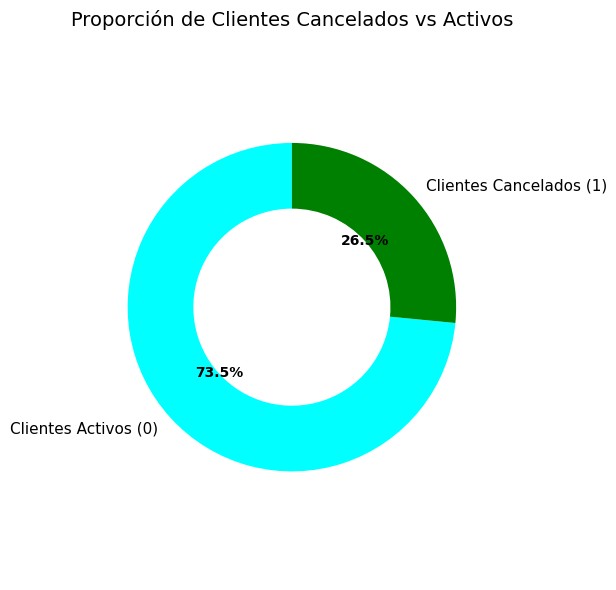

In [2278]:
import matplotlib.pyplot as plt

# Contar los valores de cancelado
valores = df_final['cancelado'].value_counts().sort_index()
labels = ['Clientes Activos (0)', 'Clientes Cancelados (1)']
colors = ['cyan', 'green']

# Crear figura
fig, ax = plt.subplots(figsize=(6, 6))

# Gráfico de pastel tipo donut
wedges, texts, autotexts = ax.pie(
    valores,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)  # Grosor del anillo
)

# Ajustar estilo de los textos del porcentaje
plt.setp(autotexts, size=10, weight='bold', color='black')
plt.setp(texts, size=11)

# Título y estilo general
ax.set_title('Proporción de Clientes Cancelados vs Activos', fontsize=14)
ax.axis('equal')  # Círculo perfecto

plt.tight_layout()
plt.show()


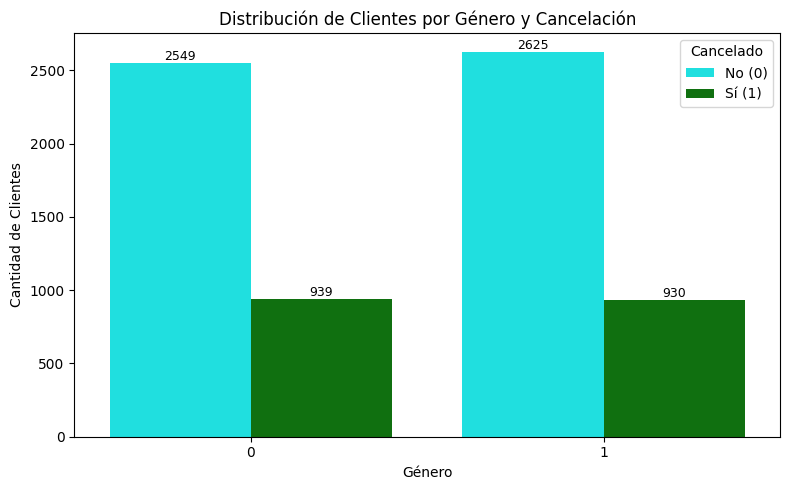

In [2279]:
import seaborn as sns

# Asegurar que la columna cancelado sea tipo entero
df_final['cancelado'] = df_final['cancelado'].astype(int)

# Crear figura
plt.figure(figsize=(8, 5))

# Gráfico de barras agrupadas
sns.countplot(
    data=df_final,
    x='genero',
    hue='cancelado',
    palette={0: 'cyan', 1: 'green'}
)

# Títulos y etiquetas
plt.title('Distribución de Clientes por Género y Cancelación')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Cancelado', labels=['No (0)', 'Sí (1)'])

# Mostrar valores sobre las barras
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


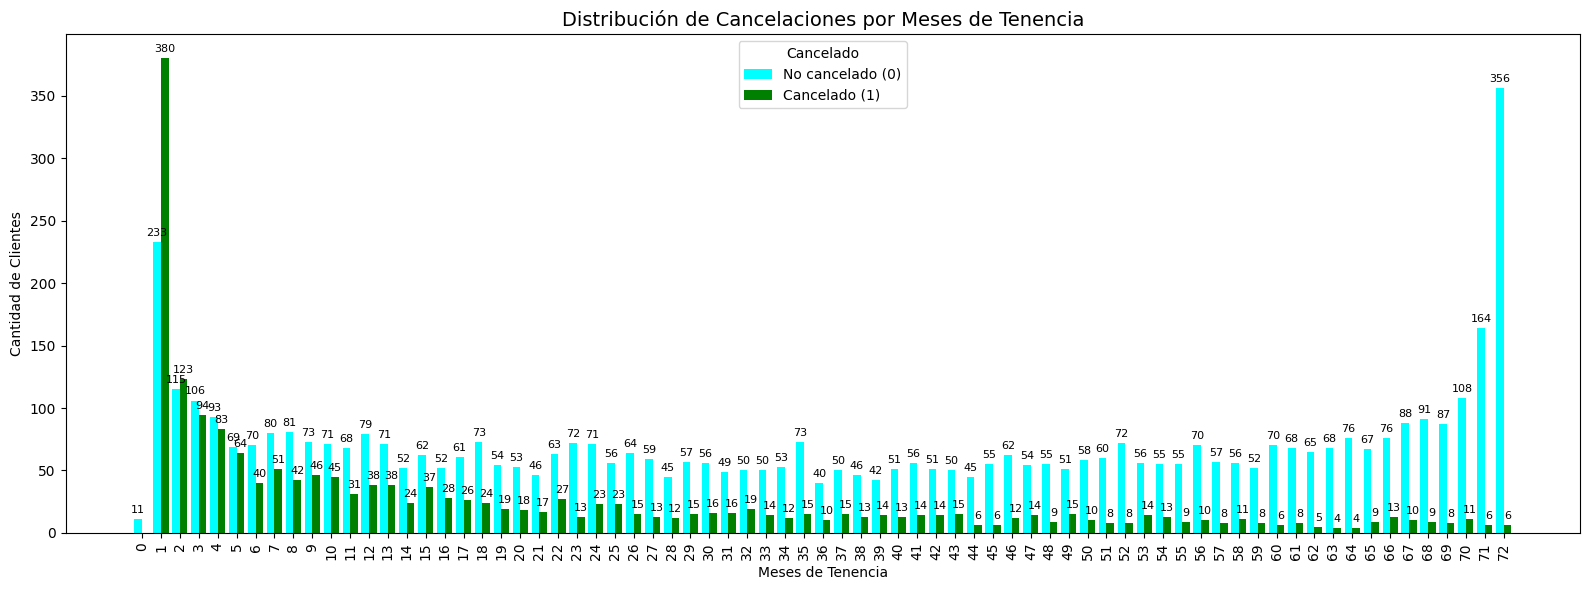

In [2280]:

# Asegurar tipos correctos
df_final['cancelado'] = df_final['cancelado'].astype(int)
df_final['tenencia'] = df_final['tenencia'].astype(int)

# Agrupar por tenencia y cancelado
conteo = df_final.groupby(['tenencia', 'cancelado']).size().unstack(fill_value=0)
conteo = conteo.sort_index()

# Preparar datos
x = conteo.index.tolist()
cancelado_0 = conteo[0].tolist()
cancelado_1 = conteo[1].tolist()
bar_width = 0.4
x_pos = list(range(len(x)))

# Crear figura amplia para evitar superposición
fig, ax = plt.subplots(figsize=(16, 6))

# Barras agrupadas
b1 = ax.bar([i - bar_width/2 for i in x_pos], cancelado_0, width=bar_width, color='cyan', label='No cancelado (0)')
b2 = ax.bar([i + bar_width/2 for i in x_pos], cancelado_1, width=bar_width, color='green', label='Cancelado (1)')

# Título y etiquetas
ax.set_title('Distribución de Cancelaciones por Meses de Tenencia', fontsize=14)
ax.set_xlabel('Meses de Tenencia')
ax.set_ylabel('Cantidad de Clientes')
ax.set_xticks(x_pos)
ax.set_xticklabels(x, rotation=90)  # Rotar etiquetas del eje X
ax.legend(title='Cancelado')

# Agregar valores sobre cada barra (text_auto)
for bars in [b1, b2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(
                f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=8
            )

plt.tight_layout()
plt.show()


In [2281]:
# Agrupar por tenencia y cancelado
df_grouped = df_final.groupby(['tenencia', 'cancelado']).size().unstack(fill_value=0)

# Calcular el % de cancelado por tenencia
df_grouped['cancelado_tasa'] = (df_grouped.get(1, 0) / df_grouped.sum(axis=1)) * 100

# Mostrar el resultado
print(df_grouped[['cancelado_tasa']])


cancelado  cancelado_tasa
tenencia                 
0                0.000000
1               61.990212
2               51.680672
3               47.000000
4               47.159091
...                   ...
68               9.000000
69               8.421053
70               9.243697
71               3.529412
72               1.657459

[73 rows x 1 columns]


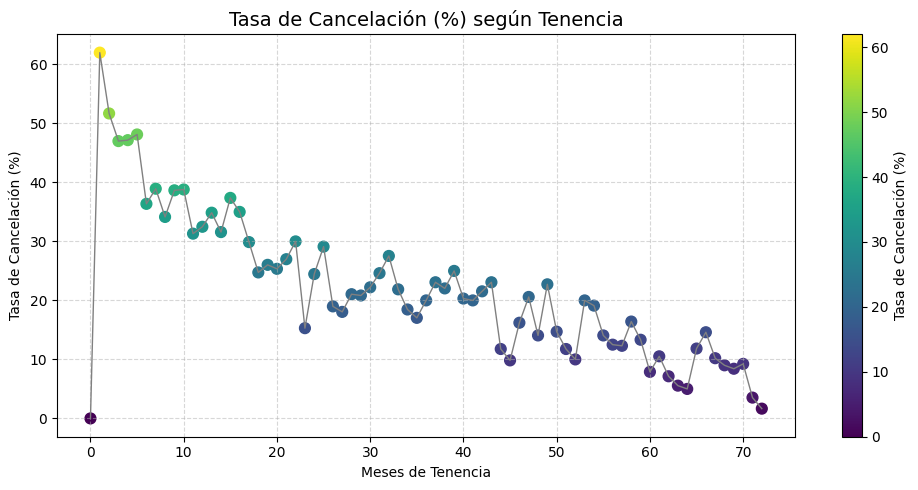

In [2282]:
# Asegúrate de que 'tenencia' esté como columna, no como índice
df_plot = df_grouped.reset_index()

# Crear gráfico de línea con marcadores
plt.figure(figsize=(10, 5))
sc = plt.scatter(df_plot['tenencia'], df_plot['cancelado_tasa'], c=df_plot['cancelado_tasa'], cmap='viridis', s=60)
plt.plot(df_plot['tenencia'], df_plot['cancelado_tasa'], color='gray', linewidth=1)

# Títulos y etiquetas
plt.title('Tasa de Cancelación (%) según Tenencia', fontsize=14)
plt.xlabel('Meses de Tenencia')
plt.ylabel('Tasa de Cancelación (%)')

# Barra de color (equivalente a color='cancelado_tasa')
cbar = plt.colorbar(sc)
cbar.set_label('Tasa de Cancelación (%)')

# Ajuste estético
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


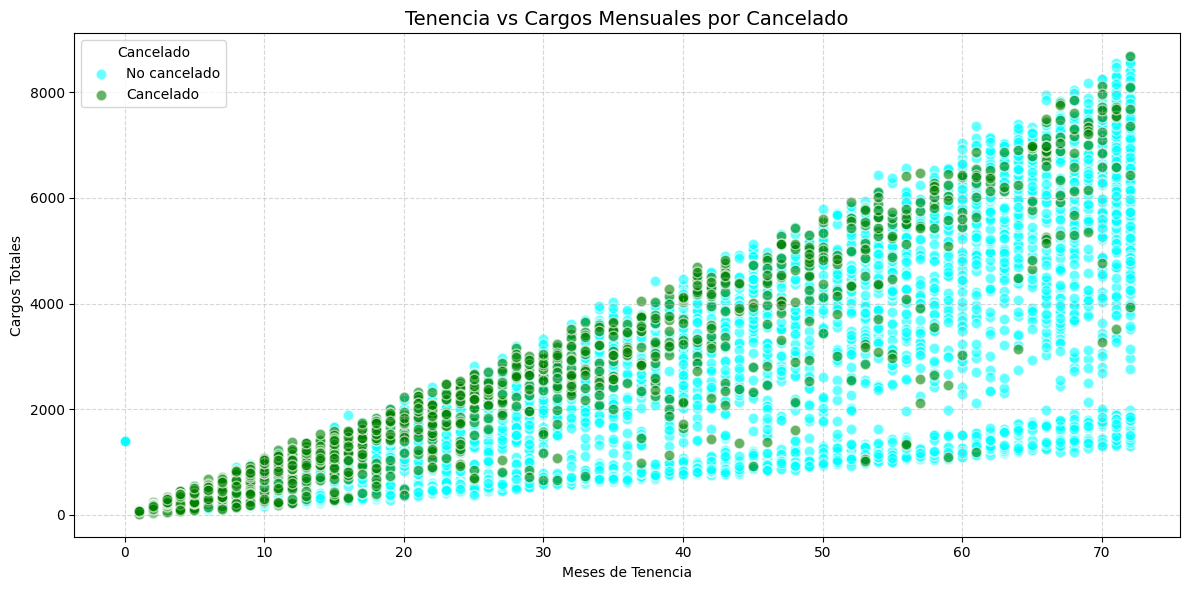

In [2283]:
# Asegurar que los tipos sean correctos
df_final['cancelado'] = df_final['cancelado'].astype(int)

# Crear figura
plt.figure(figsize=(12, 6))

# Graficar los puntos para cada grupo
colors = {0: 'cyan', 1: 'green'}
labels = {0: 'No cancelado', 1: 'Cancelado'}

for cancelado_valor in df_final['cancelado'].unique():
    subset = df_final[df_final['cancelado'] == cancelado_valor]
    plt.scatter(
        subset['tenencia'],
        subset['cargos_totales'],
        label=labels[cancelado_valor],
        color=colors[cancelado_valor],
        alpha=0.6,
        edgecolors='w',
        s=60
    )

# Etiquetas y formato
plt.title('Tenencia vs Cargos Mensuales por Cancelado', fontsize=14)
plt.xlabel('Meses de Tenencia')
plt.ylabel('Cargos Totales')
plt.legend(title='Cancelado')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


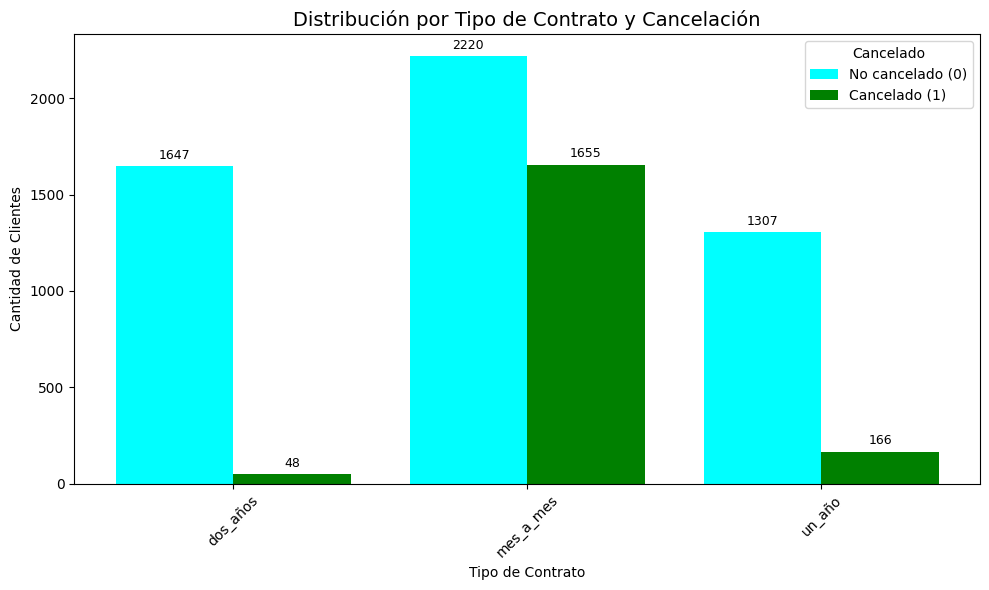

In [2284]:
# Asegurar tipos adecuados
df_final['cancelado'] = df_final['cancelado'].astype(int)

# Agrupar por tipo_contrato y cancelado
conteo = df_final.groupby(['tipo_contrato', 'cancelado']).size().unstack(fill_value=0)
conteo = conteo.sort_index()

# Preparar datos para graficar
labels = conteo.index.tolist()
cancelado_0 = conteo[0].tolist()
cancelado_1 = conteo[1].tolist()
x_pos = range(len(labels))
bar_width = 0.4

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Barras agrupadas por tipo de contrato
b1 = ax.bar([i - bar_width/2 for i in x_pos], cancelado_0, width=bar_width, color='cyan', label='No cancelado (0)')
b2 = ax.bar([i + bar_width/2 for i in x_pos], cancelado_1, width=bar_width, color='green', label='Cancelado (1)')

# Etiquetas y título
ax.set_title('Distribución por Tipo de Contrato y Cancelación', fontsize=14)
ax.set_xlabel('Tipo de Contrato')
ax.set_ylabel('Cantidad de Clientes')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, rotation=45)
ax.legend(title='Cancelado')

# Agregar valores encima de las barras
for bars in [b1, b2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.annotate(
                str(height),
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center',
                va='bottom',
                fontsize=9
            )

plt.tight_layout()
plt.show()


In [2285]:
px.box(df_final, x = 'cancelado', y = 'cargos_mensuales', color = 'cancelado')

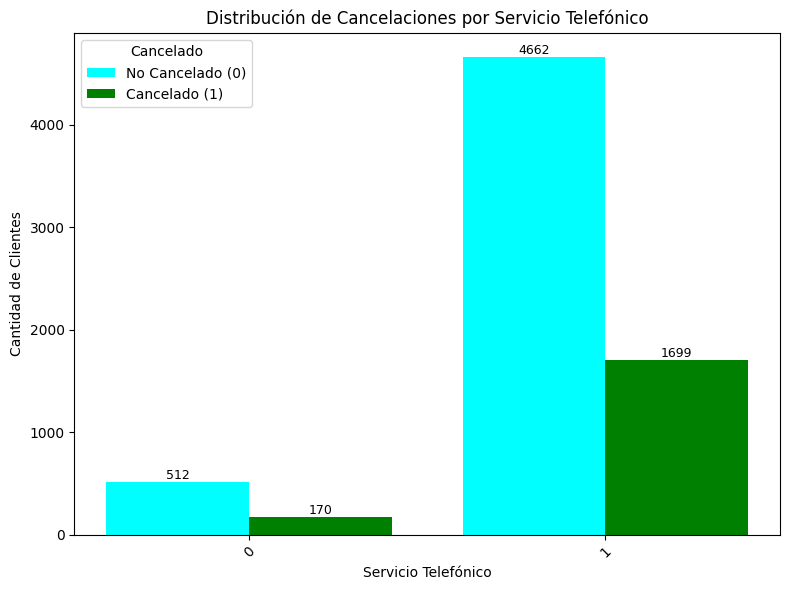

In [2286]:
# Asegurar que los valores sean consistentes
df_final['cancelado'] = pd.to_numeric(df_final['cancelado'], errors='coerce').astype(int)
df_final['servicio_telefonico'] = df_final['servicio_telefonico'].astype(str)

# Crear tabla de conteo cruzado
conteo = df_final.groupby(['servicio_telefonico', 'cancelado']).size().unstack(fill_value=0)

# Preparar valores
labels = conteo.index.tolist()
cancelado_0 = conteo[0].tolist()
cancelado_1 = conteo[1].tolist()
x = range(len(labels))
bar_width = 0.4

# Crear gráfico
plt.figure(figsize=(8, 6))
b1 = plt.bar([i - bar_width/2 for i in x], cancelado_0, width=bar_width, color='cyan', label='No Cancelado (0)')
b2 = plt.bar([i + bar_width/2 for i in x], cancelado_1, width=bar_width, color='green', label='Cancelado (1)')

# Agregar valores encima de las barras
for bars in [b1, b2]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                yval + 1,
                int(yval),
                ha='center',
                va='bottom',
                fontsize=9
            )

# Etiquetas
plt.title('Distribución de Cancelaciones por Servicio Telefónico')
plt.xlabel('Servicio Telefónico')
plt.ylabel('Cantidad de Clientes')
plt.xticks(x, labels, rotation=45)
plt.legend(title='Cancelado')
plt.tight_layout()
plt.show()


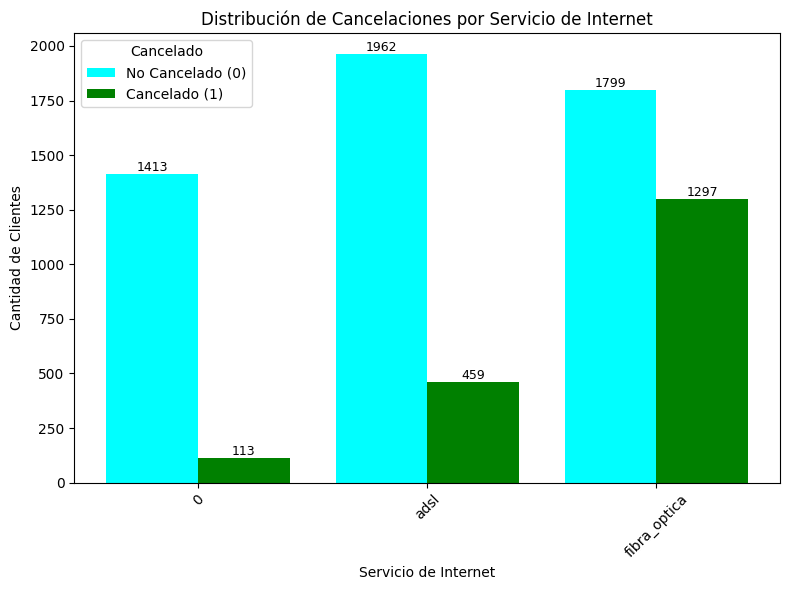

In [2287]:
# Asegurar tipos correctos
df_final['cancelado'] = pd.to_numeric(df_final['cancelado'], errors='coerce').astype(int)
df_final['servicio_internet'] = df_final['servicio_internet'].astype(str)

# Crear tabla de conteo
conteo = df_final.groupby(['servicio_internet', 'cancelado']).size().unstack(fill_value=0)

# Preparar valores para graficar
labels = conteo.index.tolist()
cancelado_0 = conteo[0].tolist()
cancelado_1 = conteo[1].tolist()
x = range(len(labels))
bar_width = 0.4

# Crear gráfico de barras agrupadas
plt.figure(figsize=(8, 6))
b1 = plt.bar([i - bar_width/2 for i in x], cancelado_0, width=bar_width, color='cyan', label='No Cancelado (0)')
b2 = plt.bar([i + bar_width/2 for i in x], cancelado_1, width=bar_width, color='green', label='Cancelado (1)')

# Agregar texto encima de cada barra
for bars in [b1, b2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                str(int(height)),
                ha='center',
                va='bottom',
                fontsize=9
            )

# Etiquetas
plt.title('Distribución de Cancelaciones por Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Cantidad de Clientes')
plt.xticks(x, labels, rotation=45)
plt.legend(title='Cancelado')
plt.tight_layout()
plt.show()


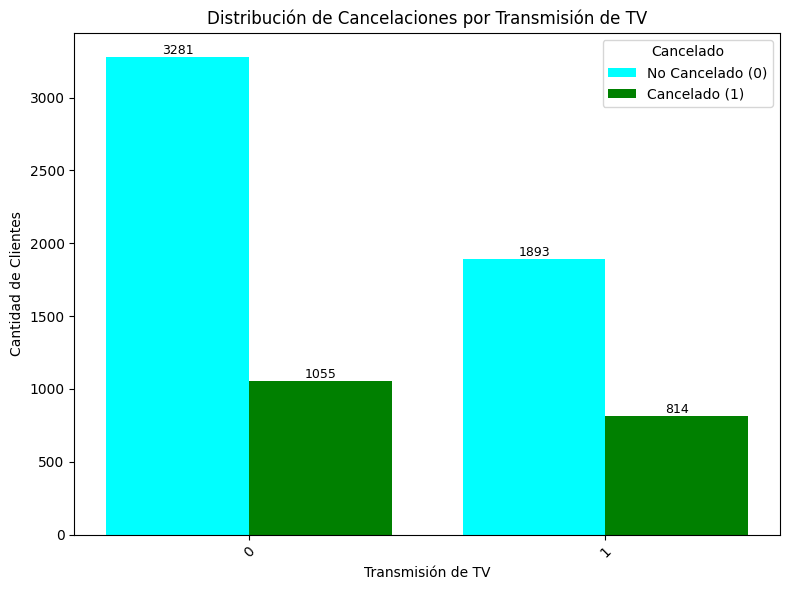

In [2288]:
# Asegurar tipos correctos
df_final['cancelado'] = pd.to_numeric(df_final['cancelado'], errors='coerce').astype(int)
df_final['transmision_tv'] = df_final['transmision_tv'].astype(str)

# Crear tabla de conteo cruzado
conteo = df_final.groupby(['transmision_tv', 'cancelado']).size().unstack(fill_value=0)

# Preparar datos para graficar
labels = conteo.index.tolist()
cancelado_0 = conteo[0].tolist()
cancelado_1 = conteo[1].tolist()
x = range(len(labels))
bar_width = 0.4

# Crear gráfico de barras agrupadas
plt.figure(figsize=(8, 6))
b1 = plt.bar([i - bar_width/2 for i in x], cancelado_0, width=bar_width, color='cyan', label='No Cancelado (0)')
b2 = plt.bar([i + bar_width/2 for i in x], cancelado_1, width=bar_width, color='green', label='Cancelado (1)')

# Agregar etiquetas de conteo
for bars in [b1, b2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                str(int(height)),
                ha='center',
                va='bottom',
                fontsize=9
            )

# Títulos y etiquetas
plt.title('Distribución de Cancelaciones por Transmisión de TV')
plt.xlabel('Transmisión de TV')
plt.ylabel('Cantidad de Clientes')
plt.xticks(x, labels, rotation=45)
plt.legend(title='Cancelado')
plt.tight_layout()
plt.show()


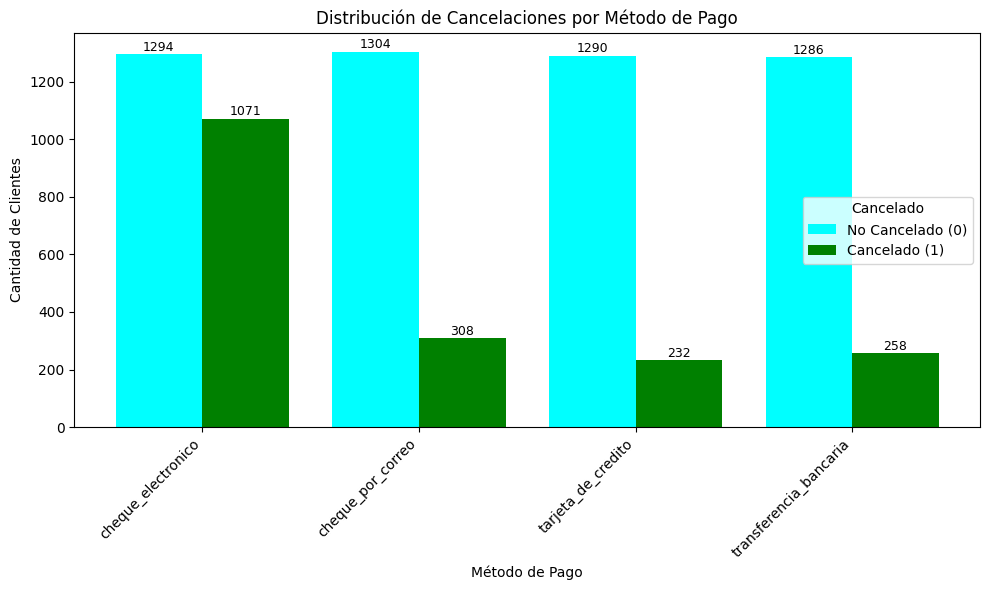

In [2289]:
# Asegurar tipos correctos
df_final['cancelado'] = pd.to_numeric(df_final['cancelado'], errors='coerce').astype(int)
df_final['metodo_pago'] = df_final['metodo_pago'].astype(str)

# Crear tabla de conteo cruzado
conteo = df_final.groupby(['metodo_pago', 'cancelado']).size().unstack(fill_value=0)

# Preparar datos para graficar
labels = conteo.index.tolist()
cancelado_0 = conteo[0].tolist()  # No canceló
cancelado_1 = conteo[1].tolist()  # Canceló
x = range(len(labels))
bar_width = 0.4

# Crear gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
b1 = plt.bar([i - bar_width/2 for i in x], cancelado_0, width=bar_width, color='cyan', label='No Cancelado (0)')
b2 = plt.bar([i + bar_width/2 for i in x], cancelado_1, width=bar_width, color='green', label='Cancelado (1)')

# Etiquetas sobre las barras
for bars in [b1, b2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                str(int(height)),
                ha='center',
                va='bottom',
                fontsize=9
            )

# Personalización
plt.title('Distribución de Cancelaciones por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend(title='Cancelado')
plt.tight_layout()
plt.show()


###**Recuento de evasión por variables categóricas**

In [2290]:
import pandas as pd
from tabulate import tabulate

# Asegurar que 'cancelado' sea numérico (0 y 1)
df_final['cancelado'] = df_final['cancelado'].astype(int)

# Lista de columnas categóricas a analizar
columnas_categoricas = [
    'genero', 'adulto', 'pareja', 'dependencias', 'tipo_contrato',
    'servicio_telefonico', 'proteccion_dispositivo', 'metodo_pago',
    'soporte_tecnico', 'seguridad_en_linea', 'transmision_tv',
    'transmision_peliculas', 'respaldo_en_linea', 'servicio_internet',
    'factura_sin_papel', 'lineas_multiples'
]

# Lista donde guardaremos todas las tablas por variable
tabla_total = []

for columna in columnas_categoricas:
    # Agrupar por la variable y cancelado
    tabla = df_final.groupby([columna, 'cancelado']).size().unstack(fill_value=0).reset_index()

    # Asegurar que existan ambas columnas (0: no cancelado, 1: cancelado)
    if 1 not in tabla.columns:
        tabla[1] = 0
    if 0 not in tabla.columns:
        tabla[0] = 0

    # Reordenar las columnas
    tabla = tabla[[columna, 0, 1]]

    # Calcular totales y % cancelados
    tabla['total'] = tabla[0] + tabla[1]
    tabla['% cancelados'] = round((tabla[1] / tabla['total']) * 100, 2)

    # Insertar columna con el nombre de la variable
    tabla.insert(0, 'variable', columna)

    # Renombrar columnas de forma estándar
    tabla.columns = ['variable', 'categoria', 'no', 'si', 'total', '% cancelados']

    # Agregar a la lista total
    tabla_total.append(tabla)

# Unir todas las tablas en una sola
tabla_final = pd.concat(tabla_total, ignore_index=True)

# Ordenar por % cancelados de mayor a menor
tabla_final = tabla_final.sort_values(by='% cancelados', ascending=False)

# Función para aplicar colores ANSI en consola
def colorear(valor):
    if valor >= 40:
        return f"\033[91m{valor}%\033[0m"  # Rojo
    elif valor >= 20:
        return f"\033[93m{valor}%\033[0m"  # Amarillo
    else:
        return f"\033[92m{valor}%\033[0m"  # Verde

# Aplicar el color a la columna de % cancelados
tabla_coloreada = tabla_final.copy()
tabla_coloreada['% cancelados'] = tabla_final['% cancelados'].apply(colorear)

# Mostrar tabla con tabulate (formato bonito en consola)
print(tabulate(tabla_coloreada, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════════════╤════════════════════════╤══════╤══════╤═════════╤════════════════╕
│ variable               │ categoria              │   no │   si │   total │ % cancelados   │
╞════════════════════════╪════════════════════════╪══════╪══════╪═════════╪════════════════╡
│ metodo_pago            │ cheque_electronico     │ 1294 │ 1071 │    2365 │ 45.29%         │
├────────────────────────┼────────────────────────┼──────┼──────┼─────────┼────────────────┤
│ tipo_contrato          │ mes_a_mes              │ 2220 │ 1655 │    3875 │ 42.71%         │
├────────────────────────┼────────────────────────┼──────┼──────┼─────────┼────────────────┤
│ servicio_internet      │ fibra_optica           │ 1799 │ 1297 │    3096 │ 41.89%         │
├────────────────────────┼────────────────────────┼──────┼──────┼─────────┼────────────────┤
│ adulto                 │ 1                      │  666 │  476 │    1142 │ 41.68%         │
├────────────────────────┼────────────────────────┼──────┼──────┼─────

###**Conteo de evasión por variables numéricas**

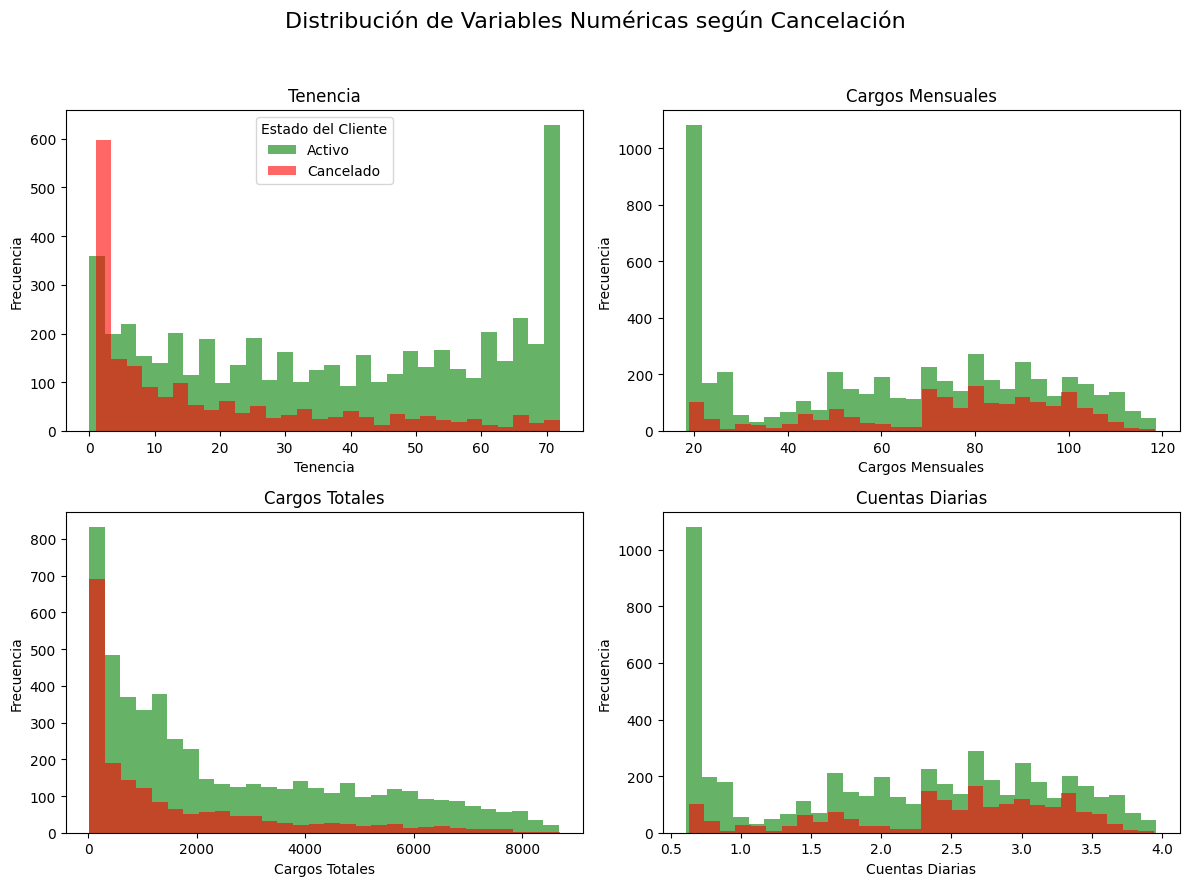

In [2291]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar tipos numéricos válidos
df_final['cancelado'] = pd.to_numeric(df_final['cancelado'], errors='coerce').astype(int)

numericas = ['tenencia', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias']
colores = {0: 'green', 1: 'red'}
etiquetas = {0: 'Activo', 1: 'Cancelado'}

# Crear figura 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Generar histogramas
for i, var in enumerate(numericas):
    ax = axes[i]
    for estado in [0, 1]:
        data = df_final[df_final['cancelado'] == estado][var].dropna()
        ax.hist(
            data,
            bins=30,
            alpha=0.6,
            color=colores[estado],
            label=etiquetas[estado] if i == 0 else None  # leyenda solo en primer gráfico
        )
    ax.set_title(var.replace('_', ' ').title(), fontsize=12)
    ax.set_xlabel(var.replace('_', ' ').title())
    ax.set_ylabel('Frecuencia')

# Ajustes generales
fig.suptitle('Distribución de Variables Numéricas según Cancelación', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # dejar espacio para el título

# Añadir leyenda solo una vez
axes[0].legend(title='Estado del Cliente')

plt.show()


###**Informe Final**




---
## 🔹 Introducción

El objetivo de este análisis es comprender y abordar el **problema de evasión de clientes** —reflejado en la columna `cancelado` (0 = activo, 1 = cancelado)— mediante el análisis de su comportamiento en variables numéricas y categóricas. La meta es descubrir patrones y factores determinantes que permitan diseñar estrategias efectivas para **reducir la deserción**, aumentar la retención y maximizar el valor del cliente a lo largo del tiempo.

---

## 🔹 Limpieza y Tratamiento de Datos

1. **Importación de datos**
   Se cargó el dataset `'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'` en un DataFrame de pandas para su posterior análisis.

2. **Normalización de variables**

   * La columna `cancelado` se transformó a tipo numérico (0/1) para facilitar los cálculos.
   * Se verificaron y rellenaron faltantes en variables clave como `tipo_contrato`, `metodo_pago` y var. binarias.

3. **Agrupaciones categóricas**

   * Se creó una tabla que cruza cada variable categórica con `cancelado` para calcular la tasa de evasión por categoría.
   * Se destacaron los porcentajes relevantes y se aplicaron estilos de color para identificar rápidamente categorías de riesgo elevado (>40%) o moderado (>20%).

4. **Preparación de datos numéricos**

   * Se seleccionaron variables numéricas importantes: `tenencia`, `cargos_mensuales`, `cargos_totales` y `cuentas_diarias`.
   * Se eliminaron o imputaron valores extremos si existían antes del análisis visual (en su caso, no fue necesario según la visualización).

---

## 🔹 Análisis Exploratorio de Datos

### 1. **Evasión por variables categóricas**

Se generó una tabla con el porcentaje de cancelaciones por categoría en variables como género, método de pago, tipo de contrato, entre otras. Las categorías con mayor tasa de evasión fueron:

* Ciertos métodos de pago (p. ej. débito bancario vs. tarjeta).
* Contratos sin facturación digital.
* Usuarios sin servicios añadidos (soporte técnico, protección de dispositivos, etc.).

Estos segmentos fueron destacados con colores (rojo >40%, amarillo >20%) para priorización adicional.

### 2. **Histograma superpuesto por variables numéricas**

Se visualizó la distribución de las variables cuantitativas, diferenciando entre clientes activos y cancelados:

```python
# Ejemplo de interpretación visual:
# - tenencia: la curva roja (cancelado) se concentra en valores bajos.
# - cargos_mensuales: los cancelados muestran frecuencias notables en planes intermedios.
# - cargos_totales: evidencian que los que cancelan no llegan a generar altos ingresos.
```

**Conclusión visual**:

* Los cancelados tienden a agruparse en menor tiempo de permanencia.
* Su gasto mensual también indica posible insatisfacción económica.
* Sus cargos totales muestran que son clientes con poca inversión.

### 3. **Gráficos 2 x 2 (subplots)**

Se integraron los histogramas en una sola figura con subplots para comparar fácilmente las cuatro variables numéricas.

* Las diferencias de distribución entre clientes activos y cancelados fueron claras:

  * Cancelados predominan en tenencias cortas (<12 meses).
  * Activos concentran más gasto mensual y total a largo plazo.

---

## 🔹 Conclusiones e Insights

1. **Problema principal:**

   * La mayor parte de las cancelaciones ocurre tempranamente, especialmente durante los primeros 6–12 meses de servicio.

2. **Factores de riesgo identificados:**

   * Planes con menor carga de servicios y facturación física.
   * Clientes con menor gasto mensual y total, quienes fracasan en convertirse en clientes valiosos.

3. **Segmentación:**

   * Clientes jóvenes, sin servicios extra ni facturación digital, y con métodos de pago básicos muestran alta tasa de evasión.

4. **Impresión de valor:**

   * Quienes contratan servicios adicionales (respaldo, soporte, protección) tienen menor tasa de cancelación. Esto indica que **perciben mayor valor**.

---

## 🔹 Recomendaciones

| Estrategia                            | Detalle                                                                                                                         |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| **Onboarding intensivo**              | En los primeros 3 a 6 meses ofrecer soporte proactivo, tutoriales y beneficios exclusivos (descuentos, paquetes).               |
| **Upselling dirigido**                | Incentivar servicios adicionales a nuevos clientes mediante pruebas gratuitas, bundling o campañas.                             |
| **Promoción de factura digital**      | Destacar beneficios (rapidez, ecología, acceso online) para reducir el abandono.                                                |
| **Segmentación de contratos y pagos** | Incentivar métodos de pago que se asocian con mayor retención; analizar condiciones de contratos básicos.                       |
| **Programas de fidelidad**            | Premiar clientes con más de 12 meses de tenencia o alto gasto total mediante beneficios recurrentes.                            |
| **Modelos predictivos**               | Implementar modelos que identifiquen clientes en riesgo temprano, utilizando variables como tenencia, gasto y tipo de servicio. |
| **Comunicación clara**                | Educar al cliente sobre el valor de servicios adicionales con contenido educativo o casos de éxito.                             |

---

###**Análisis de correlación entre variables**

In [2292]:
numericas = ['tenencia', 'cargos_mensuales', 'cargos_totales', 'cuentas_diarias', 'cancelado']
df_numerico = df_final[numericas]


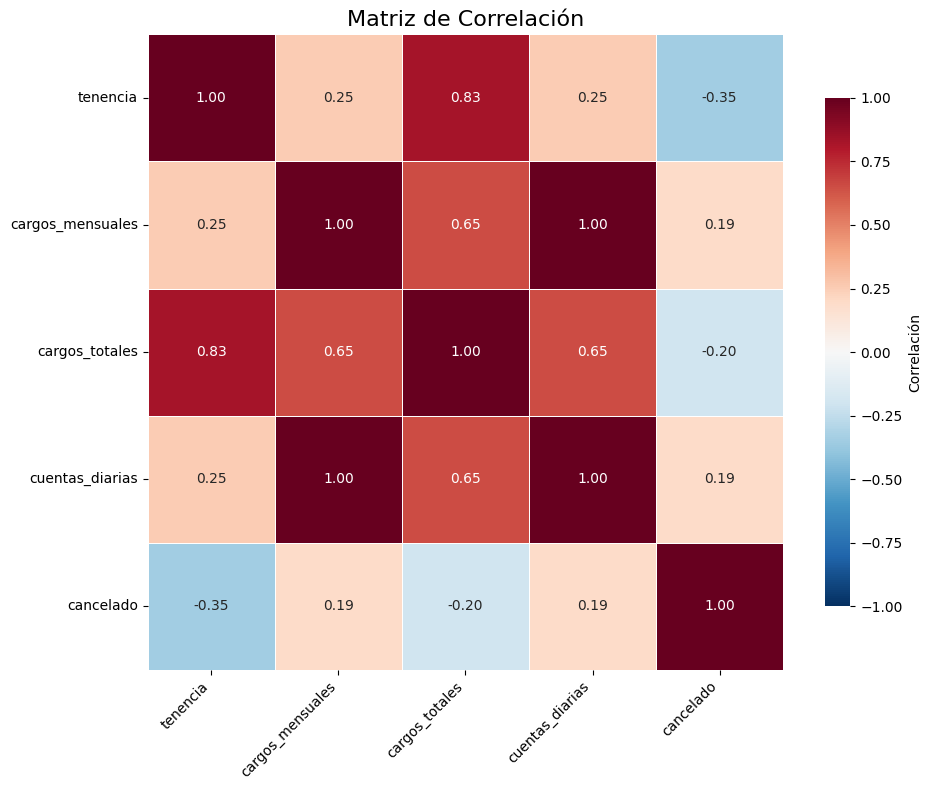

In [2293]:
# Calcular matriz de correlación
corr_matrix = df_numerico.corr().round(2)

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,              # Mostrar valores
    cmap='RdBu_r',           # Escala de colores similar a Plotly
    vmin=-1, vmax=1,         # Rango de correlación
    square=True,             # Cuadrados proporcionales
    fmt='.2f',               # Formato numérico
    linewidths=0.5,          # Líneas divisorias
    cbar_kws={"shrink": 0.8, "label": "Correlación"}
)

# Títulos y estética
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Interpretación de la correlación con cancelado busca valores cercano a:

* +1: correlación positiva (aumenta junto con cancelado).

* −1: correlación negativa (disminuye cuando cancelado aumenta).

* 0: no hay correlación lineal.

De lo que se puede observar:

* tenencia y cancelado podrían tener correlación negativa → clientes con más meses tienden a no cancelar.

* cuentas_diarias o cargos_totales podrían mostrar correlación baja pero significativa, indicando que quienes usan más servicios o invierten más tienden a quedarse.



In [2294]:
# Obtener correlaciones con 'cancelado'
correlaciones = df_numerico.corr()['cancelado'].drop('cancelado')

# Ordenar por valor absoluto
top_corr = correlaciones.abs().sort_values(ascending=False).head(5)

print("Top 5 variables más correlacionadas con cancelado:")
print(top_corr)


Top 5 variables más correlacionadas con cancelado:
tenencia            0.352229
cargos_totales      0.199034
cuentas_diarias     0.193412
cargos_mensuales    0.193356
Name: cancelado, dtype: float64
